In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
from tqdm import tqdm
import seaborn as sns
import matplotlib as mpl
import archetypes as arch
import matplotlib.pyplot as plt
from scipy.stats import entropy
from scipy.stats import pearsonr
import sklearn.metrics as metrics
from scipy.spatial.distance import cdist
from scipy.spatial.distance import jensenshannon
from scipy.cluster.hierarchy import linkage, leaves_list

In [2]:
import os
import sys
module_path = os.path.abspath('/mnt/c/Users/demeter_turos/PycharmProjects/chrysalis')
if module_path not in sys.path:
    sys.path.append(module_path)

import chrysalis as ch

plt.rcParams['svg.fonttype'] = 'none'

data_path = '/mnt/c/Users/demeter_turos/PycharmProjects/chrysalis/data/stereo_seq/'

In [3]:
def plot_spots(adata, clist, marker='h', spot_size=1.05, colorbar=True, cmap='viridis', **kwrgs):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.axis('off')
    row = adata.obsm['spatial'][:, 0]
    col = adata.obsm['spatial'][:, 1] * -1
    row_range = np.ptp(row)
    col_range = np.ptp(col)
    ax.set_xlim((np.min(row) - 0.1 * row_range, np.max(row) + 0.1 * row_range))
    ax.set_ylim((np.min(col) - 0.1 * col_range, np.max(col) + 0.1 * col_range))
    ax.set_aspect('equal')

    # takes long time to compute the pairwise distance matrix for stereo-seq or slide-seq samples, so by looking at
    # only 5000 spots is a good enough approximation
    if len(row) < 5000:
        distances = cdist(np.column_stack((row, col)), np.column_stack((row, col)))
    else:
        distances = cdist(np.column_stack((row[:5000], col[:5000])), np.column_stack((row[:5000], col[:5000])))

    np.fill_diagonal(distances, np.inf)
    min_distance = np.min(distances)

    # get the physical length of the x and y axes
    ax_len = np.diff(np.array(ax.get_position())[:, 0]) * fig.get_size_inches()[0]
    size_const = ax_len / np.diff(ax.get_xlim())[0] * min_distance * 72
    size = size_const ** 2 * spot_size
    scatter = ax.scatter(row, col, s=size, marker=marker, c=clist, cmap=cmap, **kwrgs)
    if colorbar:
        plt.colorbar(mappable=scatter)
        cbar = fig.axes[-1]
        cbar.set_frame_on(False)
        # cbar.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

In [ ]:
adata = sc.read_h5ad(data_path + 'E12.5_E1S1.MOSTA.h5ad')

adata = adata[adata.obs['annotation'] != 'Cavity']

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.scatter(adata.obsm['spatial'][:, 0], adata.obsm['spatial'][:, 1] * -1, c=adata.obs['Regulon - Pou3f3'], s=1)
plt.show()

sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)

ch.detect_svgs(adata, min_morans=0.05, min_spots=0.05, neighbors=8)
adata.write(data_path + 'chr_E12.5_E1S1_no_cavity_knn_8.h5ad')

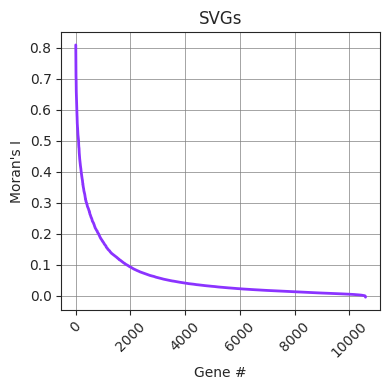

In [15]:
adata = sc.read_h5ad(data_path + 'chr_E12.5_E1S1_no_cavity_knn_8.h5ad')

ch.pca(adata, n_pcs=50)
ch.aa(adata, n_pcs=20, n_archetypes=24)

ch.plot_svgs(adata)
plt.show()

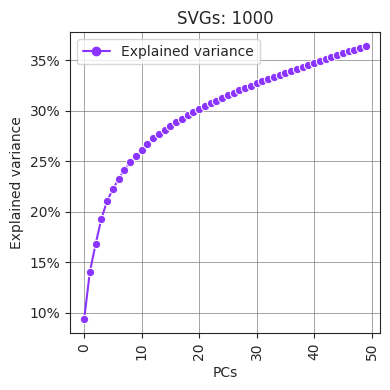

In [16]:
ch.plot_explained_variance(adata)
plt.show()

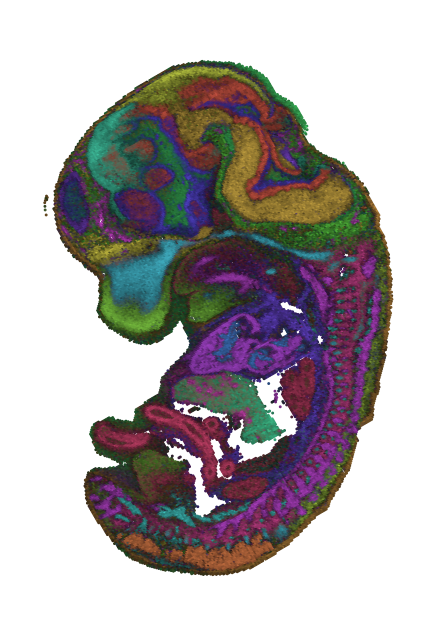

In [17]:
ch.plot(adata, dim=24, figsize=(8, 8))
plt.show()

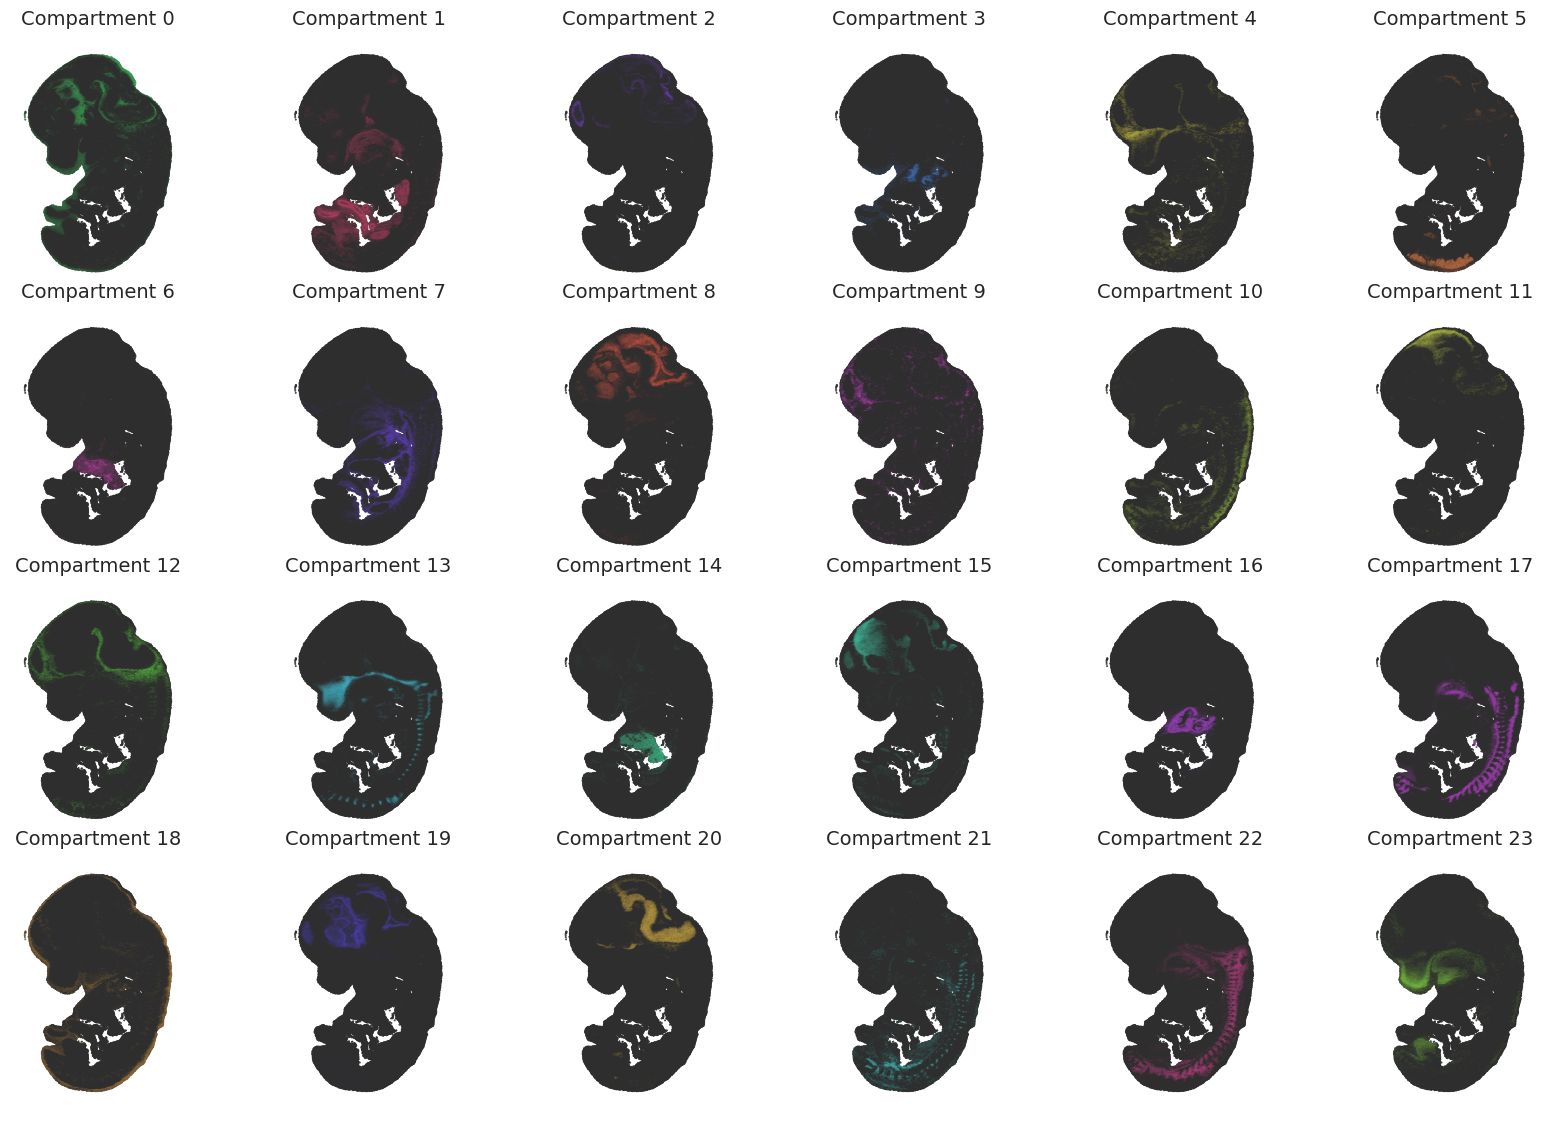

In [18]:
ch.plot_compartments(adata, ncols=6, title_size=14, rasterized=True)
plt.show()

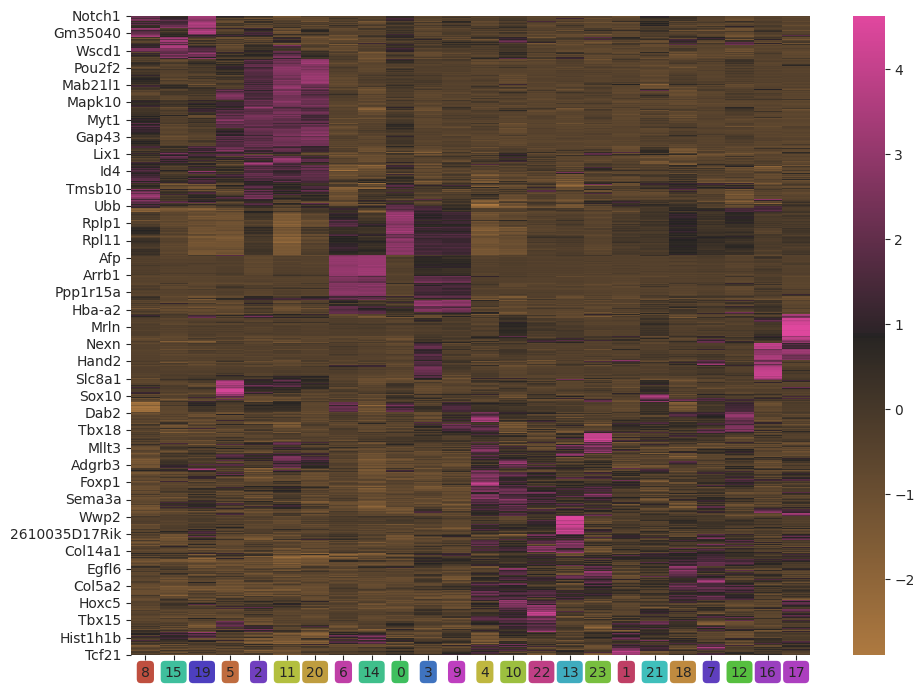

In [19]:
ch.plot_heatmap(adata, reorder_comps=True, figsize=(10, 7), rasterized=True)
plt.show()

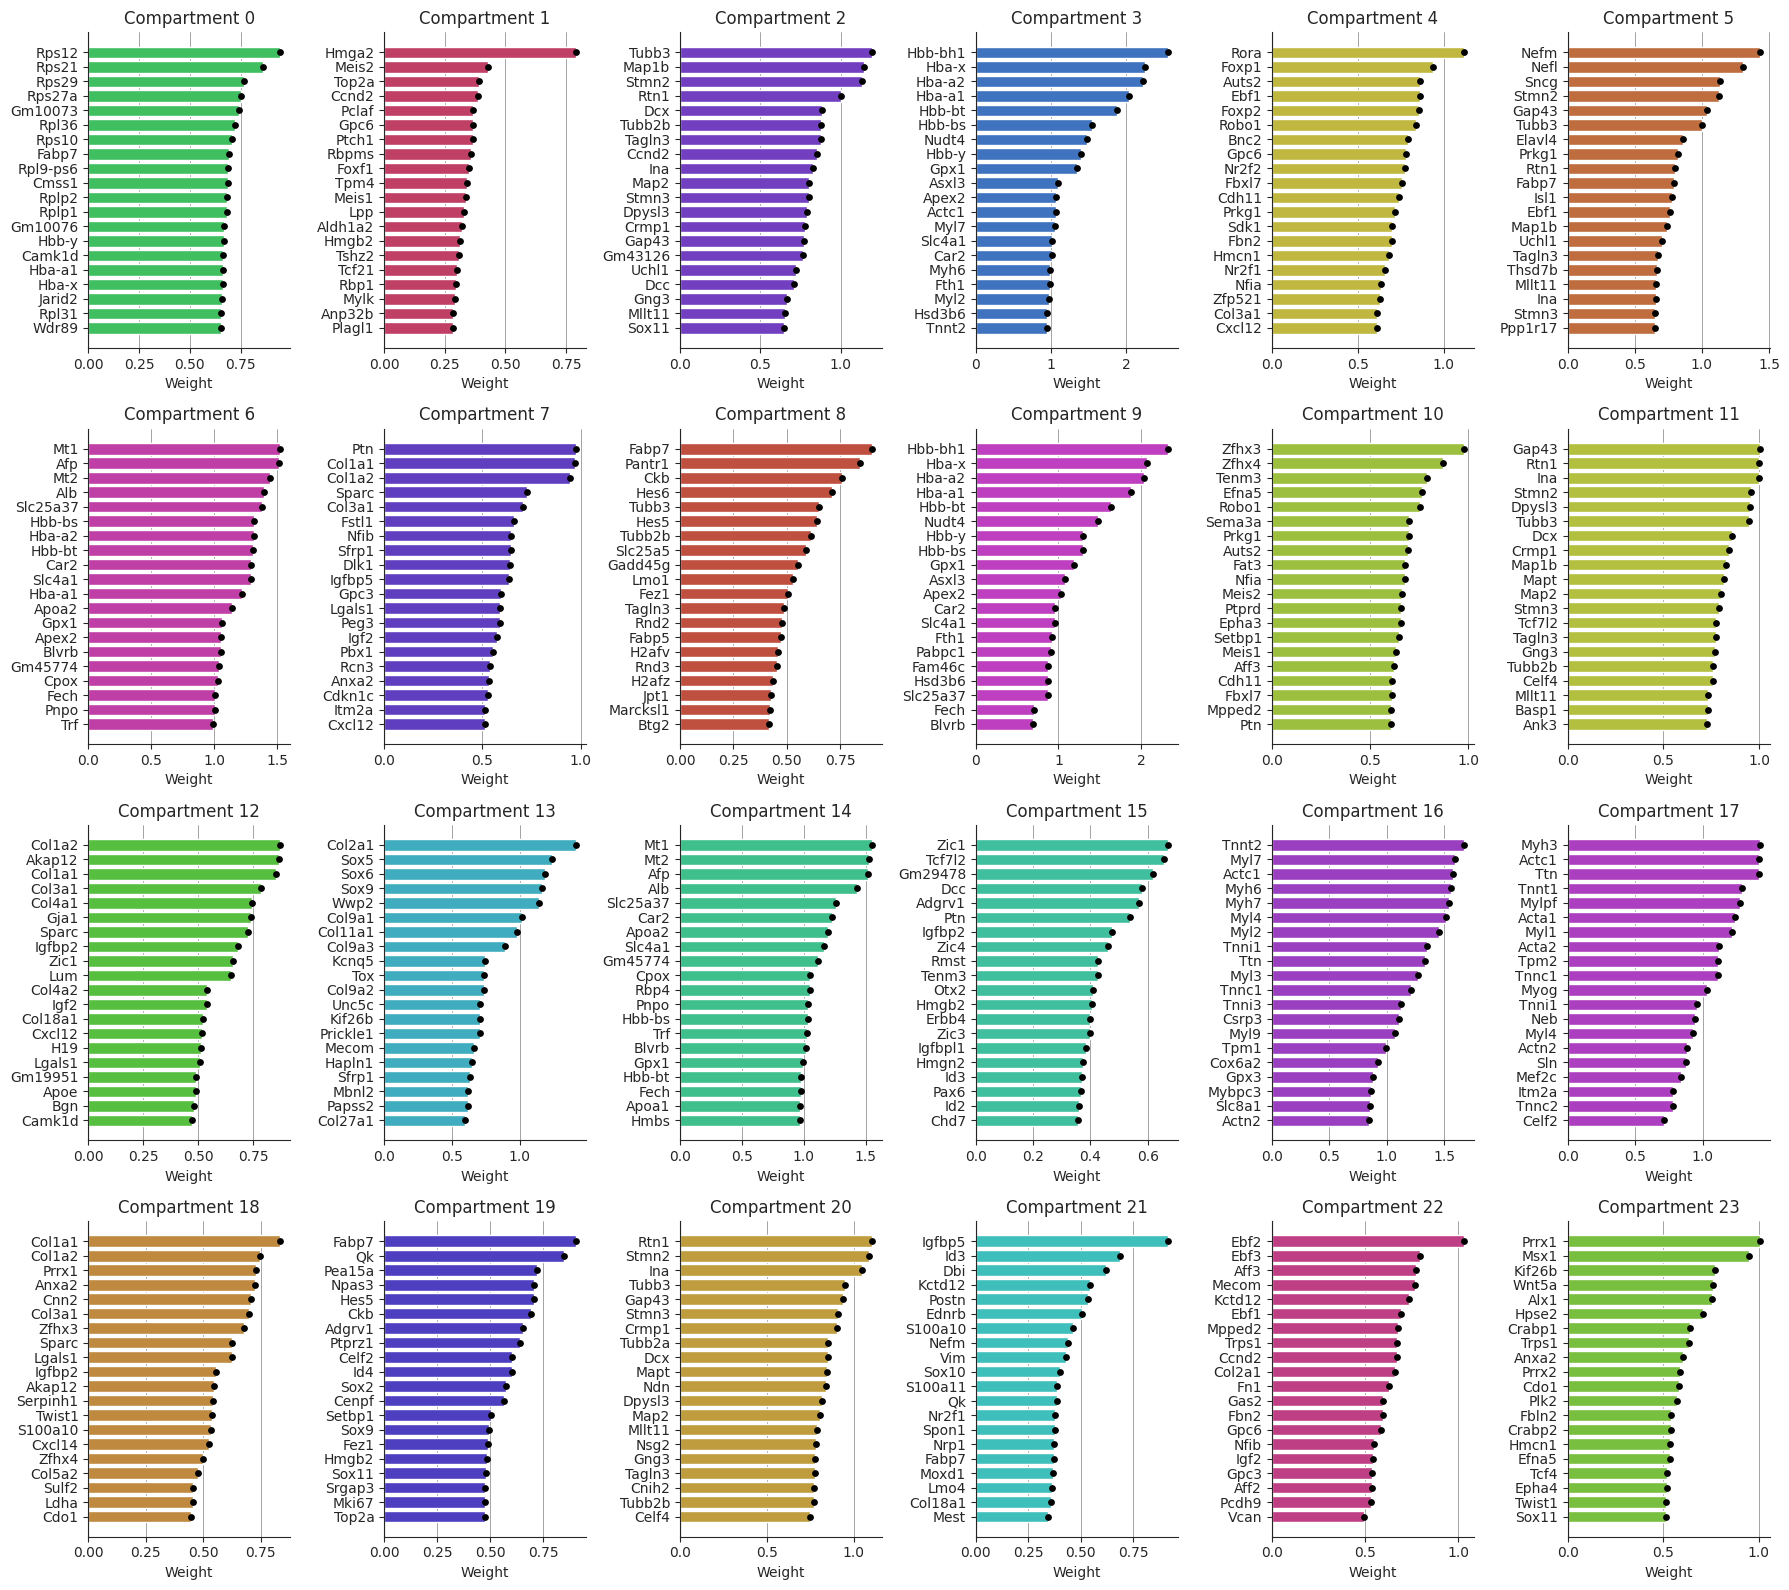

In [20]:
ch.plot_weights(adata, ncols=6)
plt.show()

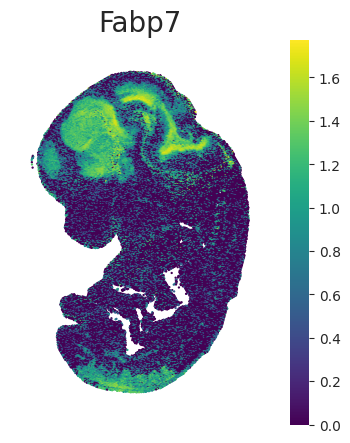

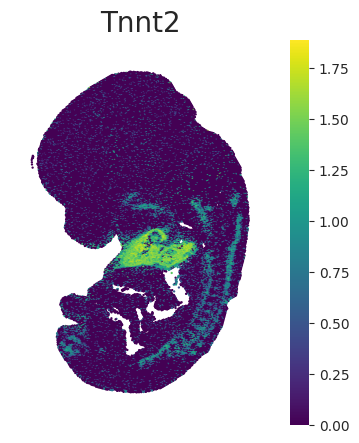

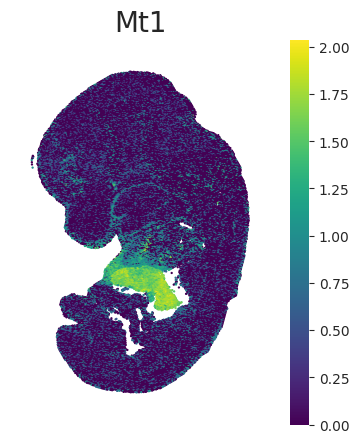

In [14]:
plot_spots(adata, adata[:, 'Fabp7'].X.toarray(), cmap='viridis', rasterized=True)
plt.title('Fabp7', size=20)
plt.show()

plot_spots(adata, adata[:, 'Tnnt2'].X.toarray(), cmap='viridis', rasterized=True)
plt.title('Tnnt2', size=20)
plt.show()

plot_spots(adata, adata[:, 'Mt1'].X.toarray(), cmap='viridis', rasterized=True)
plt.title('Mt1', size=20)
plt.show()

In [ ]:
adata = sc.read_h5ad(data_path + 'E9.5_E1S1.MOSTA.h5ad')

adata = adata[adata.obs['annotation'] != 'Cavity']

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plt.scatter(adata.obsm['spatial'][:, 0], adata.obsm['spatial'][:, 1] * -1, c=adata.obs['Regulon - Pou3f3'], s=10)
plt.show()

sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)

ch.detect_svg(adata, min_morans=0.05, min_spots=0.05, neighbors=8)
adata.write(data_path + 'chr_E9.5_E1S1_no_cavity_knn_8.h5ad')

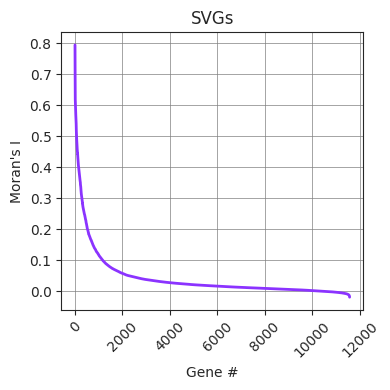

In [28]:
adata = sc.read_h5ad(data_path + 'chr_E9.5_E1S1_no_cavity_knn_8.h5ad')

ch.pca(adata, n_pcs=50)
ch.aa(adata, n_pcs=20, n_archetypes=24)

ch.plot_svgs(adata)
plt.show()

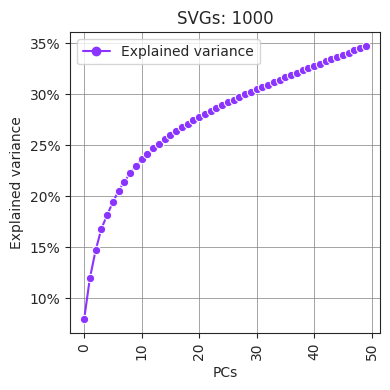

In [23]:
ch.plot_explained_variance(adata)
plt.show()

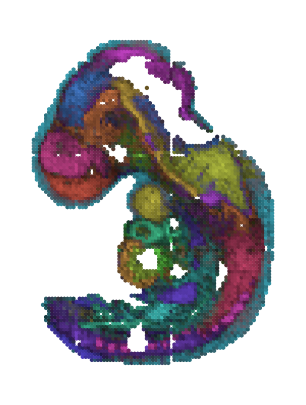

In [24]:
ch.plot(adata, dim=24, rasterized=True)
plt.show()

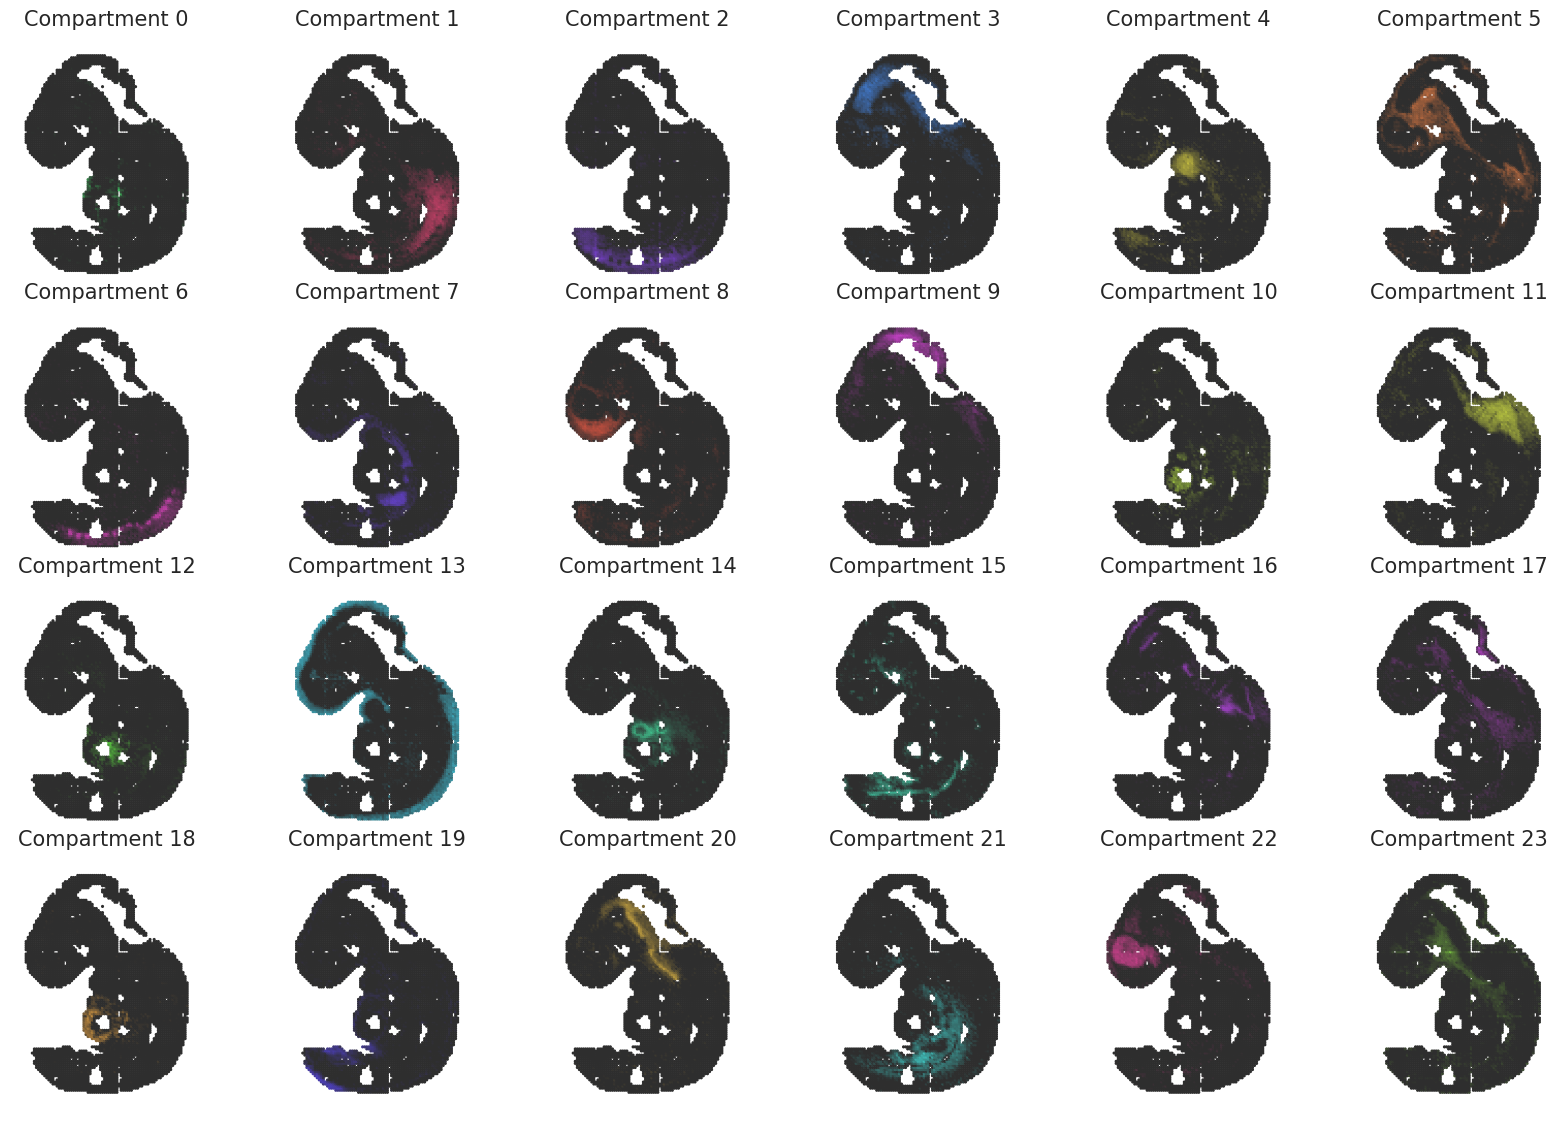

In [26]:
ch.plot_compartments(adata, ncols=6, rasterized=True, title_size=15)
plt.show()

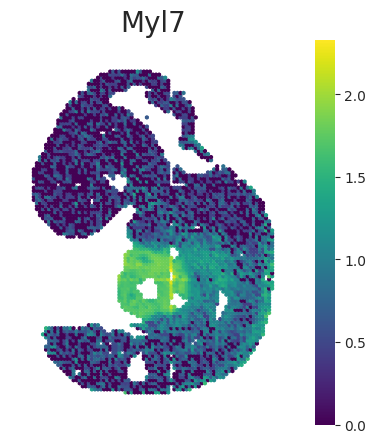

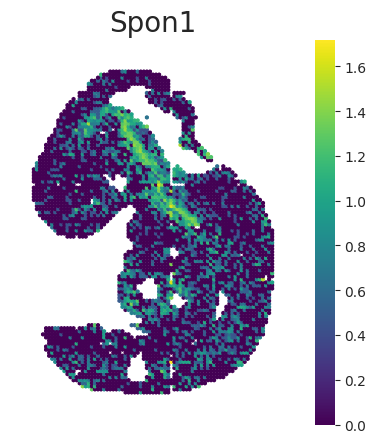

In [27]:
plot_spots(adata, adata[:, 'Myl7'].X.toarray(), cmap='viridis', rasterized=True)
plt.title('Myl7', size=20)
plt.show()

plot_spots(adata, adata[:, 'Spon1'].X.toarray(), cmap='viridis', rasterized=True)
plt.title('Spon1', size=20)
plt.show()